# Naive Bayes Implementation over Donarchoose Dataset

## 1.1 Loading Data

In [736]:
import pandas
data = pandas.read_csv('preprocessed_data.csv',nrows=10000)

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [737]:
# Splitting Data into features and Class label
Y=data["project_is_approved"]
# dropping the class label 
X=data.drop(columns=["project_is_approved"])

# Number of Data points of each class label
print("Number of points belong to each label")
data["project_is_approved"].value_counts()

Number of points belong to each label


1    8620
0    1380
Name: project_is_approved, dtype: int64

In [738]:
from sklearn.model_selection import train_test_split
import math
# Stratified Spliting of data into train and test data
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,random_state=52,stratify=Y)
xtrain,xcv,ytrain,ycv=train_test_split(xtrain,ytrain,random_state=52,stratify=ytrain)


<h2>1.3 Make Data Model Ready: encoding project essay</h2>

In [739]:
# Converting essay column to Bow representation

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4),max_features=5000)
vectorizer.fit(xtrain["essay"].values)
# Converting essay column to Bow representation
#xtrain["essay"]
#print(vectorizer.get_feature_names())
#print(xtrain.shape,ytrain.shape)
#print(xtest.shape,ytest.shape)
#print(xcv.shape,ycv.shape)
x_train_essay_bow=vectorizer.transform(xtrain["essay"])
x_cv_essay_bow = vectorizer.transform(xcv['essay'].values)
x_test_essay_bow = vectorizer.transform(xtest['essay'].values)
print("Shape after BOW Vectorization")
print(x_train_essay_bow.shape,ytrain.shape)
print(x_test_essay_bow.shape,ytest.shape)
print(x_cv_essay_bow.shape,ycv.shape)
li=[]   # Creating list to store all unique features so at last i can use this for finding most important features
li.extend(vectorizer.get_feature_names())


Shape after BOW Vectorization
(5625, 5000) (5625,)
(2500, 5000) (2500,)
(1875, 5000) (1875,)


In [740]:
# Converting essay column to tfidf representation
from sklearn.feature_extraction.text import TfidfVectorizer
tfvectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4),max_features=5000)
tfvectorizer.fit(xtrain["essay"])
x_train_essay_tf=tfvectorizer.transform(xtrain["essay"])
x_cv_essay_tf = tfvectorizer.transform(xcv['essay'].values)
x_test_essay_tf = tfvectorizer.transform(xtest['essay'].values)
print("Shape after TFIDF Vectorization")
print(x_train_essay_tf.shape,ytrain.shape)
print(x_test_essay_tf.shape,ytest.shape)
print(x_cv_essay_tf.shape,ycv.shape)
#print(tfvectorizer.get_feature_names())

Shape after TFIDF Vectorization
(5625, 5000) (5625,)
(2500, 5000) (2500,)
(1875, 5000) (1875,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

### Encoding Categorical features: school_state, teacher_prefix, project_grade_category, cleam_categories, and clean_subcategories

In [741]:
# Creating function to encode Categoral features

def encodingcategricalfeatures(train,test,cv):
    "dont forget to write doc string later"
    #print(train.shape)
    vectorizer=CountVectorizer()
    vectorizer.fit(train)
    #print(vectorizer.get_feature_names())
    li.extend(vectorizer.get_feature_names())
    return(vectorizer.transform(train),vectorizer.transform(test),vectorizer.transform(cv))

#calling encodingcategricalfeatures function and storing encoded return features)
x_train_sch_enc,x_test_sch_enc,x_cv_sch_enc=encodingcategricalfeatures(xtrain['school_state'],xtest["school_state"],xcv["school_state"])
x_train_tchpr_enc,x_test_tchpr_enc,x_cv_tchpr_enc=encodingcategricalfeatures(xtrain['teacher_prefix'],xtest["teacher_prefix"],xcv["teacher_prefix"])
x_train_prct_enc,x_test_prct_enc,x_cv_prct_enc=encodingcategricalfeatures(xtrain['project_grade_category'],xtest["project_grade_category"],xcv["project_grade_category"])
x_train_clncat_enc,x_test_clncat_enc,x_cv_clncat_enc=encodingcategricalfeatures(xtrain['clean_categories'],xtest["clean_categories"],xcv["clean_categories"])
x_train_clnsubcat_enc,x_test_clnsubcat_enc,x_cv_clnsubcat_enc=encodingcategricalfeatures(xtrain['clean_subcategories'],xtest["clean_subcategories"],xcv["clean_subcategories"])
#print(x_test_sch_enc[0].toarray())
#print(x_train_sch_enc.shape,ytrain.shape)
#print(x_train_tchpr_enc.shape,ytrain.shape)
#print(x_train_prct_enc.shape,ytrain.shape)
#print(x_train_clncat_enc.shape,ytest.shape)
#print(x_train_clnsubcat_enc.shape,ycv.shape)


### Encoding Numerical features: teacher_number_of_previously_posted_projects and price

In [742]:
li.extend(["teacher_number_of_previously_posted_projects","price"])
len(li)

5096

In [743]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
def encodingnumericalfeatures(train,test,cv):
    normalizer = Normalizer()
    normalizer.fit(train.values.reshape(1,-1))
    return(normalizer.transform(train.values.reshape(1,-1)),normalizer.transform(test.values.reshape(1,-1)),normalizer.transform(cv.values.reshape(1,-1)))
    
x_train_tchpst_nor,x_test_tchpst_nor,x_cv_tchpst_nor= encodingnumericalfeatures(xtrain["teacher_number_of_previously_posted_projects"],xtest["teacher_number_of_previously_posted_projects"],xcv["teacher_number_of_previously_posted_projects"])   
x_train_prc_nor,x_test_prc_nor,x_cv_prc_nor= encodingnumericalfeatures(xtrain["price"],xtest["price"],xcv["price"])   
#print(x_train_prc_nor.max())
#np.argmax(x_train_prc_nor)

In [744]:
# concatinating all features
from scipy.sparse import hstack

x_tr_bow=hstack((x_train_essay_bow,x_train_sch_enc,x_train_tchpr_enc,x_train_prct_enc,x_train_clncat_enc,x_train_clnsubcat_enc,x_train_tchpst_nor.T,x_train_prc_nor.T)).tocsr()
x_te_bow=hstack((x_test_essay_bow,x_test_sch_enc,x_test_tchpr_enc,x_test_prct_enc,x_test_clncat_enc,x_test_clnsubcat_enc,x_test_tchpst_nor.T,x_test_prc_nor.T)).tocsr()
x_cv_bow=hstack((x_cv_essay_bow,x_cv_sch_enc,x_cv_tchpr_enc,x_cv_prct_enc,x_cv_clncat_enc,x_cv_clnsubcat_enc,x_cv_tchpst_nor.T,x_cv_prc_nor.T)).tocsr()
print("Final Data Matrix after BOW implentation")
print(x_tr_bow.shape)
print(x_te_bow.shape)
print((x_cv_bow.shape))

x_tr_tf=hstack((x_train_essay_tf,x_train_sch_enc,x_train_tchpr_enc,x_train_prct_enc,x_train_clncat_enc,x_train_clnsubcat_enc,x_train_tchpst_nor.T,x_train_prc_nor.T)).tocsr()
x_te_tf=hstack((x_test_essay_tf,x_test_sch_enc,x_test_tchpr_enc,x_test_prct_enc,x_test_clncat_enc,x_test_clnsubcat_enc,x_test_tchpst_nor.T,x_test_prc_nor.T)).tocsr()
x_cv_tf=hstack((x_cv_essay_tf,x_cv_sch_enc,x_cv_tchpr_enc,x_cv_prct_enc,x_cv_clncat_enc,x_cv_clnsubcat_enc,x_cv_tchpst_nor.T,x_cv_prc_nor.T)).tocsr()
print(" \nFinal Data Matrix after TFIDF implentation")

print(x_tr_tf.shape)
print(x_te_tf.shape)
print(x_cv_tf.shape)


#xtrain["price"].max()
#xtrain["clean_categories"].value_counts()

Final Data Matrix after BOW implentation
(5625, 5096)
(2500, 5096)
(1875, 5096)
 
Final Data Matrix after TFIDF implentation
(5625, 5096)
(2500, 5096)
(1875, 5096)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [797]:

def batchpredict(clf,xtr):
    ypred=[]
    n=xtr.shape[0]-(xtr.shape[0])%1000
    for i in range(0,n,1000):
        ypred.extend(clf.predict_proba(xtr[i:i+1000])[:,1])
    if xtr.shape[0]%1000!=0:
        ypred.extend(clf.predict_proba(xtr[n:])[:,1])
    return(ypred)
        

    
    

#### Applying NB on BOW featurization Data

In [820]:
# GridSearchCV-BOW
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from tqdm import tqdm

alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
alpha.sort()
train_auc = []
cv_auc = []

for i in tqdm(alpha):
    print(i)
    clf = MultinomialNB(alpha=i,class_prior=[0.5,0.5],fit_prior=False)
    clf.fit(x_tr_bow,ytrain)
    y_pred_tr=batchpredict(clf,x_tr_bow)
    y_pred_cv=batchpredict(clf,x_cv_bow)
    train_auc.append(roc_auc_score(ytrain,y_pred_tr))
    cv_auc.append(roc_auc_score(ycv, y_pred_cv))


    




  0%|                                                                                                                                           | 0/10 [00:00<?, ?it/s]

1e-05
0.0001





 20%|██████████████████████████▏                                                                                                        | 2/10 [00:00<00:00, 18.40it/s]

0.001
0.01





 40%|████████████████████████████████████████████████████▍                                                                              | 4/10 [00:00<00:00, 18.10it/s]

0.1
1





 60%|██████████████████████████████████████████████████████████████████████████████▌                                                    | 6/10 [00:00<00:00, 18.09it/s]

10
100





 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 8/10 [00:00<00:00, 17.89it/s]

1000
10000





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 18.29it/s]




-11.512925464970229
[-11.512925464970229, -9.210340371976182, -6.907755278982137, -4.605170185988091, -2.3025850929940455, 0.0, 2.302585092994046, 4.605170185988092, 6.907755278982137, 9.210340371976184]


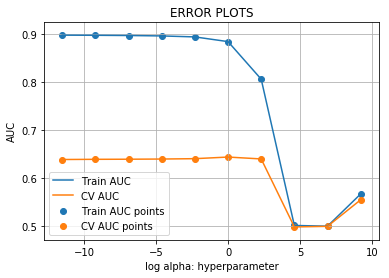

In [821]:

logalpha=[]
print(math.log(alpha[0]))
for i in range(len(alpha)):
    logalpha.append(math.log(alpha[i]))
print(logalpha)
    
plt.plot(logalpha, train_auc, label='Train AUC')
plt.plot(logalpha, cv_auc, label='CV AUC')

plt.scatter(logalpha, train_auc, label='Train AUC points')
plt.scatter(logalpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log alpha: hyperparameter")

plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


##### from the error plot we choose best alpha =0.1 ,because at this point we have maximum AUC on cv data and gap between the train and cv is less

In [822]:
best_alpha_bow=0.1




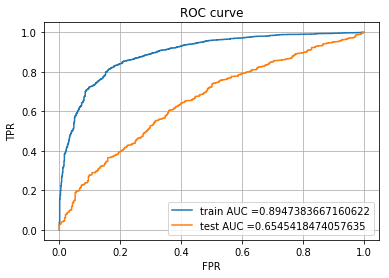

In [823]:
from sklearn.metrics import roc_curve, auc

clf = MultinomialNB(alpha=best_alpha_bow,class_prior=[0.5,0.5],fit_prior=False)
clf.fit(x_tr_bow,ytrain)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batchpredict(clf, x_tr_bow)
y_test_pred = batchpredict(clf, x_te_bow)
#print(len(y_train_pred))

train_fpr, train_tpr, tr_thresholds = roc_curve(ytrain, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(ytest, y_test_pred)    
#print(tr_thresholds)
#print(test_fpr)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()

In [824]:
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", t)
    return t

def predict_with_best_alpha(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [825]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(ytrain, predict_with_best_alpha(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(ytest, predict_with_best_alpha(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.6804825312052862 for threshold 0.37985925123214087
Train confusion matrix
[[ 636  140]
 [ 823 4026]]
Test confusion matrix
[[ 129  216]
 [ 428 1727]]


In [826]:
top_max_features_1_bow=[]
top_max_features_0_bow=[]
prob_1_bow=clf.feature_log_prob_[1,:].argsort()
prob_0_bow=clf.feature_log_prob_[0,:].argsort()
for i in range(1,21):
    top_max_features_1_bow.append(li[prob_1_bow[len(prob_1_bow)-i]])
    top_max_features_0_bow.append(li[prob_1_bow[len(prob_0_bow)-i]])
print(" On BOW featurized data top 20 features for Class label 1 :-")
print(top_max_features_1_bow)
print("="*100)
print(" On BOW featurized data the top 20 features for predicting probability of Class label 0  :-")
print(top_max_features_0_bow)


    
    
    


 On BOW featurized data top 20 features for Class label 1 :-
['students', 'school', 'learning', 'my', 'classroom', 'the', 'not', 'they', 'learn', 'help', 'my students', 'reading', 'we', 'many', 'work', 'use', 'need', 'able', 'love', 'books']
 On BOW featurized data the top 20 features for predicting probability of Class label 0  :-
['students', 'school', 'learning', 'my', 'classroom', 'the', 'not', 'they', 'learn', 'help', 'my students', 'reading', 'we', 'many', 'work', 'use', 'need', 'able', 'love', 'books']


#### Applying NB on TFIDF featurization Data

In [827]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from tqdm import tqdm

alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

alpha.sort()
train_auc_tf = []
cv_auc_tf = []

for i in tqdm(alpha):
    print(i)
    clf = MultinomialNB(alpha=i,class_prior=[0.5,0.5],fit_prior=False)
    clf.fit(x_tr_tf,ytrain)
    y_pred_tr_tf=batchpredict(clf,x_tr_tf)
    y_pred_cv_tf=batchpredict(clf,x_cv_tf)
    train_auc_tf.append(roc_auc_score(ytrain,y_pred_tr_tf))
    cv_auc_tf.append(roc_auc_score(ycv, y_pred_cv_tf))




  0%|                                                                                                                                           | 0/10 [00:00<?, ?it/s]

1e-05
0.0001





 20%|██████████████████████████▏                                                                                                        | 2/10 [00:00<00:00, 18.23it/s]

0.001
0.01





 40%|████████████████████████████████████████████████████▍                                                                              | 4/10 [00:00<00:00, 18.23it/s]

0.1
1





 60%|██████████████████████████████████████████████████████████████████████████████▌                                                    | 6/10 [00:00<00:00, 18.23it/s]

10
100





 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 8/10 [00:00<00:00, 18.08it/s]

1000
10000





100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 17.93it/s]




In [828]:
print(alpha)

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]


-11.512925464970229
[-11.512925464970229, -9.210340371976182, -6.907755278982137, -4.605170185988091, -2.3025850929940455, 0.0, 2.302585092994046, 4.605170185988092, 6.907755278982137, 9.210340371976184]


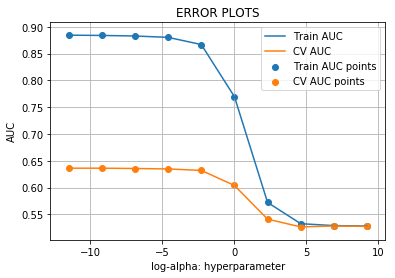

In [829]:
logalpha=[]
print(math.log(alpha[0]))
for i in range(len(alpha)):
    logalpha.append(math.log(alpha[i]))
print(logalpha)
plt.plot(logalpha, train_auc_tf, label='Train AUC')
plt.plot(logalpha, cv_auc_tf, label='CV AUC')

plt.scatter(logalpha, train_auc_tf, label='Train AUC points')
plt.scatter(logalpha, cv_auc_tf, label='CV AUC points')

plt.legend()
plt.xlabel("log-alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [832]:
best_alpha_tf=.1

5625


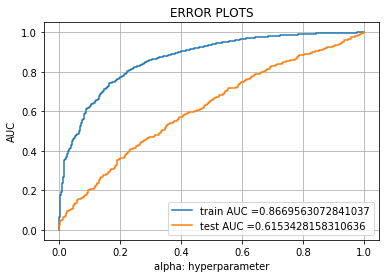

In [833]:
from sklearn.metrics import roc_curve, auc


clf = MultinomialNB(alpha=best_alpha_tf,class_prior=[0.5,0.5],fit_prior=False)
clf.fit(x_tr_tf,ytrain)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred_tf = batchpredict(clf, x_tr_tf)
y_test_pred_tf = batchpredict(clf, x_te_tf)
print(len(y_train_pred_tf))
train_fpr_tf, train_tpr_tf, tr_thresholds_tf = roc_curve(ytrain, y_train_pred_tf)
test_fpr_tf, test_tpr_tf, te_thresholds_tf = roc_curve(ytest, y_test_pred_tf)    
#print(tr_thresholds)
#print(test_fpr)
plt.plot(train_fpr_tf, train_tpr_tf, label="train AUC ="+str(auc(train_fpr_tf, train_tpr_tf)))
plt.plot(test_fpr_tf, test_tpr_tf, label="test AUC ="+str(auc(test_fpr_tf, test_tpr_tf)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [834]:
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", t)
    return t

def predict_with_best_alpha(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [835]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t_tf = find_best_threshold(tr_thresholds_tf, train_fpr_tf, train_tpr_tf)
print("Train confusion matrix")
print(confusion_matrix(ytrain, predict_with_best_alpha(y_train_pred_tf, best_t_tf)))
print("Test confusion matrix")
print(confusion_matrix(ytest, predict_with_best_alpha(y_test_pred_tf, best_t_tf)))

the maximum value of tpr*(1-fpr) 0.6245019697971523 for threshold 0.4813655089913143
Train confusion matrix
[[ 603  173]
 [ 952 3897]]
Test confusion matrix
[[ 129  216]
 [ 506 1649]]


In [836]:
top_max_features_1_tf=[]
top_max_features_0_tf=[]
prob_1_tf=clf.feature_log_prob_[1,:].argsort()
prob_0_tf=clf.feature_log_prob_[0,:].argsort()
for i in range(1,21):
    top_max_features_1_tf.append(li[prob_1_tf[len(prob_1_tf)-i]])
    top_max_features_0_tf.append(li[prob_1_tf[len(prob_0_tf)-i]])
print(" On TFIDF featurized data top 20 features of Class label 1 :-\n")
print(top_max_features_1_tf)
print("="*100,"\n")
print(" On TFIDF featurized data the top 20 features for predicting of Class label 0  :-\n")
print(top_max_features_0_tf)

 On TFIDF featurized data top 20 features of Class label 1 :-

['literacy_language', 'mrs', 'math_science', 'grades_prek_2', 'ms', 'literacy', 'grades_3_5', 'mathematics', 'literature_writing', 'grades_6_8', 'appliedlearning', 'ca', 'students', 'specialneeds', 'specialneeds', 'music_arts', 'grades_9_12', 'appliedsciences', 'mr', 'visualarts']

 On TFIDF featurized data the top 20 features for predicting of Class label 0  :-

['literacy_language', 'mrs', 'math_science', 'grades_prek_2', 'ms', 'literacy', 'grades_3_5', 'mathematics', 'literature_writing', 'grades_6_8', 'appliedlearning', 'ca', 'students', 'specialneeds', 'specialneeds', 'music_arts', 'grades_9_12', 'appliedsciences', 'mr', 'visualarts']




<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [837]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper parameter","AUC"]
x.add_row(["BOW","Naive Bayes Multinomial",best_alpha_bow,auc(test_fpr, test_tpr)])
x.add_row(["TFIDF","Naive Bayes Multinomial",best_alpha_tf,auc(test_fpr_tf, test_tpr_tf)])
print(x)

+------------+-------------------------+-----------------+--------------------+
| Vectorizer |          Model          | Hyper parameter |        AUC         |
+------------+-------------------------+-----------------+--------------------+
|    BOW     | Naive Bayes Multinomial |       0.1       | 0.6545418474057635 |
|   TFIDF    | Naive Bayes Multinomial |       0.1       | 0.6153428158310636 |
+------------+-------------------------+-----------------+--------------------+
